eccentricity = 0.258854840632246
semi major axis = 11.028094133921865
time period = 36.64738944526806


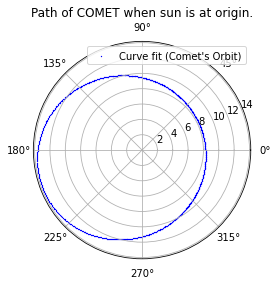

In [6]:
import pandas as pd
from math import pi
    
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from math import sin, cos, pi, atan, sqrt


db = pd.read_csv("CometData.csv")

d = db['Distance from earth(AU)'].tolist()
angle = db['Angle between comet and sun(radians)'].tolist()
time = db['# Time(in years)'].tolist()

phi = []
counter = 0
for i in angle:
    phi.append(pi - angle[counter])
    counter += 1

ptheta = []

counter_1 = 0
for t in time:
    ptheta.append(2 * pi * t + atan(d[counter_1] * sin(phi[counter_1]/(1 + d[counter_1] * cos(phi[counter_1])))))
    counter_1 += 1


pr = []
counter_2 =0
for t in time:
    pr.append(sqrt(1 + 2 * d[counter_2] * cos(phi[counter_2]) + (d[counter_2])**2))
    counter_2 += 1


def r(theta, e, r_not, theta_not):
    return r_not/(1 + e * np.cos(theta-theta_not))

popt, pcov = curve_fit(r, ptheta, pr)

e = popt[0]
r_not = popt[1]
theta_not = [2]

const = 1/0.9986546

semi_major_axis = r_not/(1 - e**2)

time_period = sqrt(semi_major_axis**3 * (const))

print(f"eccentricity = {e}")
print(f"semi major axis = {semi_major_axis}")
print(f"time period = {time_period}")
fig = plt.figure()

ax = fig.add_subplot(projection='polar')

x_ax = np.arange(0, 2 * pi, 0.01)

ax.scatter(x_ax, r(x_ax, *popt), label="Curve fit (Comet's Orbit)", color='blue',marker='*', s=0.2)

plt.title("Path of COMET when sun is at origin.")
plt.legend()
plt.show()